<a href="https://colab.research.google.com/github/zeruel91/DataAnalysis/blob/main/Analysis_ComputerShop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**제 1장 웹에서 주문수를 분석하는 테크닉**
**테크닉1: 데이터를 읽어들이자**

컴퓨터 판매 쇼핑몰

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer_master = pd.read_csv("customer_master.csv")
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [ ]:
item_master = pd.read_csv("item_master.csv")
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [ ]:
transaction_1 = pd.read_csv("transaction_1.csv")
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
transaction_detail_1 = pd.read_csv("transaction_detail_1.csv")
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


customer:고객정보 / item: 판매하는 물품의 정보 / transaction_1: 구매 내역 데이터 / transaction_detail_1:구매 내역 상세

---



**테크닉2:데이터를 결합(유니언)해보자**

이번 데이터 분석의 목적? : 매출을 올리겠다=>우량 고객을 찾고싶다!

구매내역 두개를 결합한다(세로방향으로).

In [ ]:
transaction_2 = pd.read_csv("transaction_2.csv")
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


수치상으로 두 데이터가 잘 결합되었음을 확인할 수 있다.

In [ ]:
transaction_detail_2 = pd.read_csv("transaction_detail_2.csv")
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [ ]:
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


구매 상세 내역 리스트 또한 수치상으로 잘 결합되었다.

**테크닉 3:매출 데이터끼리 결합(조인)해보자**

In [ ]:
join_data = pd.merge(transaction_detail, transaction[["transaction_id","payment_date","customer_id"]], on="transaction_id",how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


데이터를 조인할 때는 어떤 컬럼으로(키로) 조인할지 고려하자

1.부족한 데이터 컬럼이 무엇인지

2.공통되는 데이터 컬럼이 무엇인지

여기서는 transaction_id를 공통 컬럼으로 사용

**테크닉 4:마스터 데이터를 결합(조인)해보자**

In [ ]:
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


pd.merge를 이용해서 customer_master과 item_master를 조인한다.

데이터 분석을 위해 하나의 파일을 완성했다!

**테크닉 5:필요한 데이터 컬럼을 만들자**

In [ ]:
 join_data["price"] = join_data["quantity"] * join_data["item_price"]
 join_data[["quantity", "item_price", "price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


판다스의 데이터 프레임형 곱셈을 한다. 형마다 가로 방향으로 계산한다. 데이터 가공은 한번 잘못하면 큰 에러가 발생한다. 또한 자주 반복될 시 고객의 신뢰를 잃게되므로 주의한다. 데이터 결합 후에는 신중하게 갯수를 확인하자.

In [ ]:
print(join_data['price'].sum())
print(transaction['price'].sum())

971135000
971135000


데이터 가공 전의 총합과 가공 후의 총합을 확인한다.

세밀하게 확인하면 시간 소모가 많기 때문에 간단히 확인한다.

In [ ]:
join_data['price'].sum() == transaction['price'].sum()

True

항상 검산을 신경써서 하자!

**테크닉 7:각종 통계량을 파악하자**

In [ ]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

데이터 분석을 진행할 때는 크게 두가지를 파악하자.

1.결손치의 개수

2.전체 개수 파악

데이터는 항상, 거의 대부분 결손치가 포함될 가능성이 크다. 결손치는 결과에 큰 영향을 미치기 때문에 제거하거나 따로 보관해야한다.

가령 매출항목에서 A제품 매출이 10만원인데 전체 매출 단위가 10억 또는 100만원일 경우 각 경우에 따라서 의미가 크게 달라진다.

In [ ]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


describe로 전체 데이터의 숫자 의미를 파악할 수 있다.

(+std는 표준편차를 의미함)

In [ ]:
print(join_data['payment_date'].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


이 자료는 2019/02/01부터 2019/07/31까지의 데이터임을 알 수 있다.

**테크닉 8:월별로 데이터를 모아보자**

In [ ]:
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

시계열 데이터 : 시간의 흐름에 따른 데이터는 주로 주식, 날씨 등등이 있다.

dtypes로 우선 데이터의 타입을 파악한다. 

In [ ]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data["payment_date"].dt.strftime("%Y%m")
join_data[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


날짜를 추출하고 그 날짜로 월별 집계를 한다. 전체적인 매출이 늘어나고 있는지 줄어들고 있는지 파악하는 것이 분석의 첫 걸음이다.

첫 1행에서 datetime형으로 변환하고 2행에서 새로운 컬럼 payment_month를 연,월 단위로 (월만 뽑으면 데이터가 엉킬 수 있으므로 년도까지) 만든다. 

pandas에서 dt (datetime) 를 사용하면 년,월이 추출된다.

In [ ]:
join_data.groupby("payment_month").sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

groupby : 집계할 컬럼과 집계방법을 기술한다.

위 데이터를 통해 반년동안 가장 높은 매출은 2019년 7월임을 알 수 있다. 또한 매출이 5월에 갑자기 감소했다가 6월에 다시 회복되었다는 것을 알 수 있다. 한달 매출은 대략 1억 6천정도임을 알 수 있다.



**테크닉 9:월별, 상품별 데이터를 집계해보자**

In [ ]:
join_data.groupby(['payment_month','item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

groupby에 계산할 컬럼 목록을 리스트로 넣는다. 뒤의 계산조건 뒤에는 실제 계산될 컬럼 목록을 넣는다.

In [ ]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values = ['price', 'quantity'], aggfunc='sum')

price                      ... quantity              
payment_month    201902    201903    201904  ...   201905 201906 201907
item_name                                    ...                       
PC-A           24150000  26000000  25900000  ...      497    520    505
PC-B           25245000  25500000  23460000  ...      298    282    332
PC-C           19800000  19080000  21960000  ...      171    182    162
PC-D           31140000  25740000  24300000  ...      144    160    145
PC-E           59850000  64050000  64890000  ...      280    302    341

[5 rows x 12 columns]

pivot_table은 행과 컬럼을 지정해서 피봇테이블을 만든다. 행에는 상품명, 컬럼에는 월을 볼수 있게 index와 컬럼을 지정해준다. 피봇테이블을 통해 월마다 상품명의 구체적 매출을 한눈에 쉽게 살펴볼 수 있다.

**테크닉 10:상품별 매출 추이를 가시화해보자**

In [ ]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


데이터를 집계하고 집계된 데이터로 그린다. payment_month가 index로 사용된다.

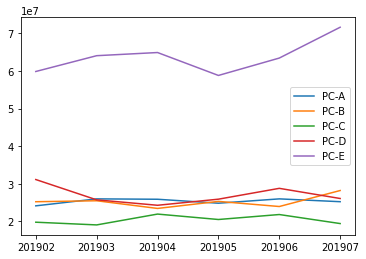

In [ ]:
%matplotlib inline
plt.plot(list(graph_data.index), graph_data['PC-A'], label='PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label='PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label='PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label='PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label='PC-E')
plt.legend()

PC-E 제품이 모든 제품 중 월등히 높은 판매량을 보이는 것을 알 수 있다. 또한 PC-C 제품은 모든 제품 중 꾸준히 낮은 판매량을 보이고 있다.

#분석 총정리

데이터를 읽어서 분석 가능한 형태로 가공하고 집계하고 가시화했다. 이 예제에서는 데이터가 깨끗하고 문제가 없었기 때문에 쉽게 분석할 수 있었는데, 거의 대부분의 데이터는 그렇지 않다. 때문에 전처리 과정에 많은 노력과 시간이 소모된다(어떤 책에서는 데이터 분석의 약 80%이 전처리라고 말할 정도이다).